In [5]:
#SET GLOBAL VARS AND IMPORTS

from draftbot_sim_adapted import *
from mtg_experimentation_utilities import *
from Agents import *
import sqlite3
import pandas as pd
import numpy as np
import json
import os

import matplotlib.pyplot as plt

draft_str='C:/Users/trist/OneDrive/Documents/draft_data_public.VOW.PremierDraft.csv'

def pull_user_info_from_dump(draft_str,n_rows=420000):
    """Given the dump file, extract the user information for n rows of the dataframe so we can further analyze 
    who was making these decisions that fall in/out of line with our bots"""

    df = pd.read_csv(draft_str, nrows=n_rows)

    df = df.iloc[:,0:9]

    df = df.drop_duplicates(keep="first", inplace=False)

    return df

#Have a couple versions of new/retooled bots to make sure the behavior makes sense over time
#Now all bots should auto-generate a unique name so you can differentiate these

In [6]:
r = pull_user_info_from_dump(draft_str)

In [4]:
# agents = [Med_Agent(arch_prefs=[0]),
# Med_Agent(arch_prefs=[1]),
# Med_Agent(arch_prefs=[2]),
# Med_Agent(arch_prefs=[3]),
# Med_Agent(arch_prefs=[4]),
# Med_Agent(arch_prefs=[5]),
# Med_Agent(arch_prefs=[6]),
# Med_Agent(arch_prefs=[7]),
# Med_Agent(arch_prefs=[8]),
# Med_Agent(arch_prefs=[9]),
# Hard_Agent(),
# Force_K_Agent(k_forced=5),
# Basic_Agent()]

# standard_agents = [
# Med_Agent(arch_prefs=[7]),
# Greedy_Agent(), 
# Hard_Agent(),
# Force_K_Agent(k_forced=1),
# Basic_Agent()]

# # #Don't run this unless you want to run ~16 mins of simulations on a good computer
# weights = ['VOM_weights_seen_rates.csv']

# dicts = [{'suffix':"Standard",
# 'draft_str':draft_str,
# 'agents':standard_agents,
# 'n_iter':42000
# },
# {'suffix':"Medium",
# 'draft_str':draft_str,
# 'agents':agents,
# 'n_iter':42000
# }]

# run_experiments(dicts,weights[0])

95a82b622c65490a8c5ddbc21f5afbb2
7b0f21b198094e0985d42738c054402f
1b3a94f1cf114e01804f9a28385a286a
936e299f21214a87b2328373402f2a1c
b9171387610147bca6123160b4217367
0683432f07ea4cb6acf574f09b5e57f0
aad7ae124f9c42749c62aea2a284eee6
4147b003e9cb46529467ce3eb847691e
b170ef68037f411b8dd33dbaa18fd968
bce15fafc0e4437db140b3f24bba0025
0bd5a520dca64b7f939e6773744f5fc5
b4e9d56b730244028a26d5a7d566b1aa
4f51492fd85c409184f949863976b441
ac1e37a64398420a87da64c4793af507
c1950c73281047e48015a90c1d680ac0
521556f52af74bbb835a814fa140df3a
35d4c8a5197749a3b9c5920c5e60b56c
a9a9c298b9f148a0aebce727c7433d70
e2c486c6be3f4d7785620c24b41e5e7d
110d0f6299364a2eba68c5977acce47a
d9db1a60a11249a3a75a1ca709e3e71c
6330b1f3b790405d90c2c9846fd3f96d
cc2da526847f4ddfa6a9fa7703763b1e
3c70983d7e7749219a0e91ec0b8c0a9e
e2dd487c4b2f48c6b0841c914701b1d4
58c8358ff014433594f1bcd64fcdd355
825cbac9b5c843858921648fc49fd519


## Analysis #1 single-archetype medium bot performance comparison
Here, we want to see if the single arch medium bots tend to do well in this set

In [9]:
df = pd.read_csv("index_data/VOM_weights_seen_rates_1000_Medium.csv")
#df_normal = pd.read_csv("results_data/VOM_weights_seen_rates_1000_.csv")

In [10]:
df

,med_agent_archs_WU_,med_agent_archs_WB_,med_agent_archs_WR_,med_agent_archs_WG_,med_agent_archs_UB_,med_agent_archs_UR_,med_agent_archs_UG_,med_agent_archs_BR_,med_agent_archs_BG_,med_agent_archs_RG_,...,hard_agent_8_16_bstart_5_bplateau_1_linear_internal_residual,hard_agent_8_16_bstart_5_bplateau_1_linear_norm_delta,force_k_agent_k_5_index,force_k_agent_k_5_picks_off,force_k_agent_k_5_internal_residual,force_k_agent_k_5_norm_delta,basic_agent_index,basic_agent_picks_off,basic_agent_internal_residual,basic_agent_norm_delta
0,[4.34888073e-03 1.81120046e-04 2.70106646e-04 ...,[3.79444175e-03 1.81120046e-04 2.29227402e-01 ...,[8.83637120e-04 8.07795407e-03 5.30899269e-04 ...,[1.73262180e-03 4.48815475e-02 5.40213291e-04 ...,[5.09390810e-03 0.00000000e+00 2.32347599e-01 ...,[3.82909419e-03 1.17003550e-02 3.35304801e-04 ...,[2.04449373e-03 3.51735130e-02 1.05248452e-03 ...,[3.36128630e-03 2.40889662e-02 3.25385368e-01 ...,[3.70781066e-03 5.90813591e-02 1.19415079e-01 ...,[1.99251507e-03 8.00043469e-01 2.01182881e-03 ...,...,0.000000,2.774511,[6],0,0.000000,2.774511,[6],0,0.000000,2.774511
1,[1.66064321e-01 2.33502823e-01 3.24708869e-04 ...,[0.00000000e+00 1.47989999e-01 1.06268357e-03 ...,[4.06837584e-05 1.37343035e-01 4.68171151e-02 ...,[3.39031320e-05 1.17172795e-01 8.56050655e-04 ...,[7.61532150e-02 8.42767649e-05 7.74873437e-04 ...,[9.42371456e-02 1.68553530e-04 8.76123566e-02 ...,[4.51318493e-02 0.00000000e+00 1.34311396e-03 ...,[6.78062639e-06 8.14675394e-04 1.37838915e-01 ...,[0.00000000e+00 0.00000000e+00 1.63092409e-03 ...,[0.00000000e+00 3.65199315e-04 1.28503535e-01 ...,...,0.507165,0.492564,[1],1,0.111909,0.492564,[1],1,0.135614,0.492564
2,[0.00000000e+00 0.00000000e+00 1.66064321e-01 ...,[1.07722012e-02 5.91552538e-03 0.00000000e+00 ...,[0.00000000e+00 0.00000000e+00 4.06837584e-05 ...,[8.55421540e-05 2.27874324e-03 3.39031320e-05 ...,[8.07151324e-03 5.17896191e-03 7.61532150e-02 ...,[1.22203077e-05 0.00000000e+00 9.42371456e-02 ...,[0.00000000e+00 5.38612038e-03 4.51318493e-02 ...,[1.48110129e-02 4.48843365e-03 6.78062639e-06 ...,[5.34027447e-03 2.49833122e-01 0.00000000e+00 ...,[3.66609231e-05 6.30682472e-03 0.00000000e+00 ...,...,1.279400,0.675310,[2],5,0.148168,0.675310,[2],2,0.114698,0.675310
3,[2.46072656e-02 9.23712546e-02 2.21760373e-01 ...,[0.00000000e+00 8.61620862e-02 2.25633422e-01 ...,[0.00000000e+00 8.41160625e-02 1.01622953e-01 ...,[0.00000000e+00 1.06006146e-01 9.70935933e-02 ...,[2.72582229e-02 2.36991160e-05 4.78054077e-04 ...,[1.49914089e-02 0.00000000e+00 2.18770510e-04 ...,[9.34585174e-03 0.00000000e+00 2.91694013e-04 ...,[0.00000000e+00 5.52979374e-05 2.51180956e-04 ...,[4.29553265e-05 4.73982320e-05 7.61645478e-04 ...,[1.22729504e-05 1.65893812e-04 3.80822739e-04 ...,...,1.316938,0.365046,[1],3,0.119627,0.365046,[1],2,0.478304,0.365046
4,[4.98213549e-05 1.94878309e-04 4.34888073e-03 ...,[9.25253733e-05 1.42232295e-01 3.79444175e-03 ...,[0. 0.00018044 0.00088364 0. 0...,[9.54577159e-02 5.41328637e-04 1.73262180e-03 ...,[2.84693456e-05 1.16161908e-01 5.09390810e-03 ...,[0.00000000e+00 9.38302971e-05 3.82909419e-03 ...,[3.87111927e-02 1.55902647e-03 2.04449373e-03 ...,[3.55866820e-05 2.33377602e-01 3.36128630e-03 ...,[7.58423368e-02 8.31264255e-02 3.70781066e-03 ...,[0.11693784 0.0022014 0.00199252 0.01144426 0...,...,2.061820,0.540540,[2],9,0.228284,0.540540,[2],8,0.689619,0.540540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41323,[7.30392638e-02 0.00000000e+00 9.35636038e-05 ...,[7.99489144e-02 6.91715139e-05 2.65096877e-04 ...,[0.06677801 0.04486716 0.00010916 0.00012743 0...,[6.35294888e-02 1.25766389e-05 1.07348641e-01 ...,[6.54943184e-06 0.00000000e+00 4.28833184e-04 ...,[0.00000000e+00 1.29224965e-02 9.35636038e-05 ...,[0.00000000e+00 0.00000000e+00 8.73806089e-02 ...,[7.20437502e-05 3.80631976e-02 2.02721141e-04 ...,[2.61977273e-05 5.65948750e-05 1.18163035e-01 ...,[4.58460229e-05 3.55541582e-02 2.46126857e-01 ...,...,0.000000,0.675310,[2],0,0.000

In [ ]:
sample = pd.read_csv('performance_data/VOM_weights_seen_rates_1000_Medium__t1_performance.csv')

In [ ]:
sample.columns

In [ ]:
def generate_results_df_from_index(index_data_path):
    """Given the index dataframe, create a truncated results df to 
    play with some of the previous versions of functions and spit out
    simulation-sized df.
    
    OUTPUT: DF with 1 row per draft and the # of picks correct (or t3) by each bot
    in a column"""



In [ ]:
display_draftwise_results("results_data/VOM_weights_seen_rates_1000_Medium_.csv",False,42)

In [ ]:
display_draftwise_results("results_data/VOM_weights_seen_rates_1000_.csv",False,42)

Based on the power scaling from our weights file, we should not be surprised that the best medium bot is for the color with the largest norm. We also see a drastic drop-off from even the best single-arch approach relative to the basic or forcing or hard bots (really most of our agents still beat this strategy). However, we also need to see the effect this will have on classification. 

In [ ]:
print("Percent Shares of Strategies in the Medium Experiment")
print(df_cat_short.groupby('name_max').agg({'name_max':'count',
"rowmax": ['min','max','mean']})['name_max','count']/984)

In [ ]:
print("Summary Stats for Medium Experiment")
print(df_cat_short.groupby('name_max').agg({'name_max':'count',
"rowmax": ['min','max','mean']}))

Looking at the classification model, we see that large chunks of the population can be covered by archs 7 (BR), 4, 0 (WU), and 1. The non-medium agents account for 117/984 = 12% of the outcomes when we look at all of the archetypes in single lists. 

### Joining in User/Match info to the Medium Experiment

In [ ]:
norm_exp = df.iloc[:,0:13]
r.rename(columns={"draft_id":'id'},inplace=True)
norm_exp = r.merge(norm_exp,"inner","id")
norm_exp['rowmax'] = norm_exp.iloc[:,9:].max(axis=1)/42
norm_exp['name_max'] = norm_exp.iloc[:,9:].idxmax(axis=1)
norm_exp['winrate'] = norm_exp['event_match_wins'] / (norm_exp['event_match_wins'] + norm_exp['event_match_losses'])

In [ ]:
norm_exp[norm_exp['rowmax']>0.45].groupby('name_max').agg({
"winrate":['min','max','mean',"median"],
"id":'count',
})

In [ ]:
#Win rates for 2 color + splash decks (unlikely our bots pull only 2 colors, so a splash would be more representative here)
# Two-color + Splash	67336	127451	52.8%
# Azorius (WU) + Splash	4083	7940	51.4%
# Dimir (UB) + Splash	6449	12782	50.5%
# Rakdos (BR) + Splash	10558	19503	54.1%
# Gruul (RG) + Splash	10115	18930	53.4%
# Selesnya (GW) + Splash	7118	13626	52.2%
# Orzhov (WB) + Splash	5573	10580	52.7%
# Golgari (BG) + Splash	9358	17604	53.2%
# Simic (GU) + Splash	6797	12830	53.0%
# Izzet (UR) + Splash	4143	7671	54.0%
# Boros (RW) + Splash	3142	5985	52.5%

In [ ]:
norm_exp[norm_exp['rowmax']>0.45].groupby(['name_max','user_rank']).agg({
"winrate":['min','max','mean',"median"],
"id":'count',
})

In [ ]:
joiner = norm_exp.groupby('name_max')['id'].count()


In [22]:
colors_df = pd.read_csv('weights_data/source_weights/VOM_Weights_default__GPWR_df.csv')
colors = colors_df.iloc[:,-1].reset_index()

In [23]:
colors = colors_df.iloc[:,-1].reset_index()

In [24]:
perf_df = df.copy()

In [25]:
# perf_df['Real_colors'] = perf_df.apply(lambda x: colors['Color'].iloc[x['Real']], axis=1)
# perf_df['Real_colors'].replace({np.nan:"N"}, inplace=True)
archetypes = ['WU','WB','WR','WG','UB','UR','UG','BR','BG','RG']
for a in archetypes:
    perf_df[a] = np.where(perf_df["Real_colors"].isin(list(a)),1,0)

In [26]:
perf_df_grouped = perf_df.groupby('id')[archetypes].sum().reset_index()

In [27]:
perf_df_grouped.iloc[:,1:]

,WU,WB,WR,WG,UB,UR,UG,BR,BG,RG
0,10,4,5,24,10,11,30,5,24,25
1,24,14,3,4,34,23,24,13,14,3
2,1,4,24,10,3,23,9,26,12,32
3,21,3,2,10,24,23,31,5,13,12
4,25,5,16,6,22,33,23,13,3,14
...,...,...,...,...,...,...,...,...,...,...
979,14,15,31,11,7,23,3,24,4,20
980,3,3,11,24,4,12,25,12,25,33
981,12,17,2,9,29,14,21,19,26,11
982,2,5,18,17,5,18,17,21,20,33


In [28]:
perf_df_grouped['rowmax2'] = perf_df_grouped.iloc[:,1:].max(axis=1)/42
perf_df_grouped['name_max2'] = perf_df_grouped.iloc[:,1:].idxmax(axis=1)

In [29]:
perf_df_grouped

,id,WU,WB,WR,WG,UB,UR,UG,BR,BG,RG,rowmax2,name_max2
0,000ff3e582f84d14b34490fdf311b984,10,4,5,24,10,11,30,5,24,25,0.714286,UG
1,00250a4028184369b1e36c609e6a33d2,24,14,3,4,34,23,24,13,14,3,0.809524,UB
2,0059be1013844ed9a8d88201b57a5a08,1,4,24,10,3,23,9,26,12,32,0.761905,RG
3,0082f26a1c5143cc942a42478e0189f6,21,3,2,10,24,23,31,5,13,12,0.738095,UG
4,00d0dfe2057140ba82baa5a48acbe919,25,5,16,6,22,33,23,13,3,14,0.785714,UR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,ff9cecdd40884dbda402a08c3c588a28,14,15,31,11,7,23,3,24,4,20,0.738095,WR
980,ffa4fc81238a44c68e5336d00d46dfdd,3,3,11,24,4,12,25,12,25,33,0.785714,RG
981,ffa74c1706b5437dbe7e06d71df6fa5d,12,17,2,9,29,14,21,19,26,11,0.690476,UB
982,ffafd96df2f3478f977720c370d943d1,2,5,18,17,5,18,17,21,20,33,0.785714,RG


In [30]:
# perf_df.groupby('id')[].sum().reset_index()

df2 = df.filter(regex='t1_match')

In [31]:
df2
df2.loc[:,'id'] = df['id']
df2 = df2.groupby('id').sum().reset_index()

c:\Users\trist\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\Users\trist\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [32]:
df2['rowmax'] = df2.iloc[:,1:].max(axis=1)/42
df2['name_max'] = df2.iloc[:,1:].idxmax(axis=1)

In [33]:
df2.iloc[:,1:]

,med_agent_archs_WU__t1_match,med_agent_archs_WB__t1_match,med_agent_archs_WR__t1_match,med_agent_archs_WG__t1_match,med_agent_archs_UB__t1_match,med_agent_archs_UR__t1_match,med_agent_archs_UG__t1_match,med_agent_archs_BR__t1_match,med_agent_archs_BG__t1_match,med_agent_archs_RG__t1_match,hard_agent_8_16_bstart_5_bplateau_1_linear_t1_match,force_k_agent_k_5_t1_match,basic_agent_t1_match,rowmax,name_max
0,10,8,7,14,11,8,19,5,15,12,12,12,13,0.452381,med_agent_archs_UG__t1_match
1,20,14,8,7,30,21,19,12,12,6,26,24,26,0.714286,med_agent_archs_UB__t1_match
2,6,7,17,8,8,17,15,19,15,31,21,21,23,0.738095,med_agent_archs_RG__t1_match
3,12,9,4,11,18,11,29,7,20,13,18,16,18,0.690476,med_agent_archs_UG__t1_match
4,12,7,13,7,14,30,10,14,5,8,21,22,22,0.714286,med_agent_archs_UR__t1_match
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,16,17,31,11,5,17,5,28,5,17,30,29,29,0.738095,med_agent_archs_WR__t1_match
980,5,7,8,11,6,7,14,12,23,32,22,22,23,0.761905,med_agent_archs_RG__t1_match
981,5,13,4,4,23,7,13,13,19,8,14,10,14,0.547619,med_agent_archs_UB__t1_match
982,5,6,15,15,9,11,14,17,19,25,24,25,23,0.595238,med_agent_archs_RG__t1_match


In [34]:
dfzogus = df2.merge(perf_df_grouped,'inner','id')

<AxesSubplot:xlabel='name_max2', ylabel='name_max'>

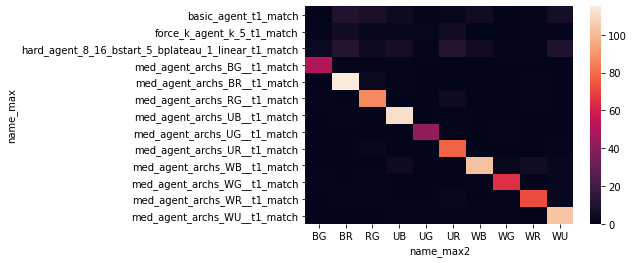

In [35]:
import seaborn as sns
sns.heatmap(dfzogus.groupby(['name_max2',
'name_max'])['id'].count().reset_index().pivot(index='name_max'
,columns='name_max2',values='id').fillna(0))

In [36]:
dfzogus.groupby(['name_max2',
'name_max'])['id'].count().reset_index().pivot(index='name_max'
,columns='name_max2',values='id').fillna(0)

name_max2,BG,BR,RG,UB,UG,UR,WB,WG,WR,WU
name_max,,,,,,,,,,
basic_agent_t1_match,0.0,10.0,8.0,4.0,1.0,2.0,5.0,0.0,1.0,6.0
force_k_agent_k_5_t1_match,1.0,5.0,2.0,2.0,2.0,5.0,0.0,0.0,1.0,1.0
hard_agent_8_16_bstart_5_bplateau_1_linear_t1_match,3.0,11.0,4.0,6.0,1.0,11.0,5.0,1.0,1.0,9.0
med_agent_archs_BG__t1_match,50.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
med_agent_archs_BR__t1_match,0.0,115.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
med_agent_archs_RG__t1_match,1.0,0.0,87.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0
med_agent_archs_UB__t1_match,0.0,1.0,0.0,111.0,0.0,1.0,0.0,0.0,0.0,0.0
med_agent_archs_UG__t1_match,0.0,0.0,0.0,0.0,43.0,1.0,0.0,1.0,0.0,0.0
med_agent_archs_UR__t1_match,0.0,0.0,2.0,0.0,0.0,77.0,0.0,0.0,0.0,1.0


In [ ]:
dfzogus.groupby(['name_max2',
'name_max'])['id'].count().reset_index().pivot(index='name_max'
,columns='name_max2',values='id').fillna(0).sum(axis=1)/984

In [ ]:
norm_exp.loc[:,['id','rowmax','name_max','winrate']]

In [ ]:
df_results = perf_df_grouped.merge(norm_exp,'inner','id')

In [ ]:
import seaborn as sns
sns.heatmap(df_results.groupby(['name_max2',
'name_max'])['id'].count().reset_index().pivot(index='name_max'
,columns='name_max2',values='id').fillna(0))

In [ ]:
df_results.groupby(['name_max2',
'name_max'])['id'].count().reset_index().pivot(index='name_max'
,columns='name_max2',values='id').fillna(0)

In [ ]:
archetypes = ['WU','WB','WR','WG','UB','UR','UG','BR','BG','RG']

In [ ]:
['WU','WB','WR','WG','UB','UR','UG','BR','BG','RG'][0] +['WU','WB','WR','WG','UB','UR','UG','BR','BG','RG'][1]

In [ ]:
lst = [0]

''.join([str(archetypes[x]) + "_" for x in lst])

In [ ]:
gb = df_master.groupby('id')['B', 'BG', 'BR', 'G', 'R', 'RG', 'U', 'UB', 'UG', 'UR', 'W', 'WB', 'WG',
       'WR', 'WU', 'Z'].sum().reset_index()

gb['rowmax2'] = gb.iloc[:,-16:].max(axis=1)/42
gb['name_max2'] = gb.iloc[:,-16:].idxmax(axis=1)

#NEW PROCESS
#SUM UP T23 arch specific values; spit out value and result
       

In [ ]:
mstr = df_master.merge(gb, 'inner', 'id')

In [ ]:
mstr

In [ ]:
norm_exp[norm_exp['rowmax']>0.45].groupby(['name_max','user_rank']).agg({
"id":'count'
}).reset_index().merge(joiner, 'inner','name_max', suffixes=("_rank","_total")).sort_values(by=['name_max','user_rank'])

## Experiment #2: 5 Good Bots Walk Into a Simulation 

In [ ]:
df_standard = pd.read_csv("results_data/VOM_weights_seen_rates_1000_Standard_.csv")
df = pd.read_csv("results_data/VOM_weights_seen_rates_1000_.csv")

In [ ]:
display_draftwise_results("results_data/VOM_weights_seen_rates_1000_Standard_.csv",False,42)

In [ ]:
display_draftwise_results("results_data/VOM_weights_seen_rates_1000_.csv",False,42)

In [ ]:
df_cat_short_standard = df_standard.iloc[:,1:6]
df_cat_short_standard['rowmax'] = df_cat_short_standard.max(axis=1)/42
df_cat_short_standard['name_max'] = df_cat_short_standard.idxmax(axis=1)

In [ ]:
#We use all drafts in this scenario (984/984)
df_cat_short_standard.groupby('name_max').agg({'name_max':'count',
"rowmax": ['min','max','mean']})

In [ ]:
#We use 777/984 drafts with this threshold
df_cat_short_standard[df_cat_short_standard['rowmax']>0.45].groupby('name_max').agg({'name_max':'count',
"rowmax": ['min','max','mean']})

In [ ]:
#We use 568/984 drafts with this threshold
df_cat_short_standard[df_cat_short_standard['rowmax']>0.5].groupby('name_max').agg({'name_max':'count',
"rowmax": ['min','max','mean']})

In [ ]:
# def preprocess_raw_json_card_dump(json_file_path:str):
#     """Peform preprocessing to remove duplicate entries from the draft and clean up filenames
#     so we can run closed-circuit equilibrium experiments"""

#     #Open the json file and create a variable for the json file
#     with open(json_file_path, 'rb') as f:
#         json_data = json.load(f)


#     accum = []
#     for c in json_data['data']['cards']:
#         accum.append(c['name'])

#     cum2 = []
#     for x in accum:
#         x = x.replace("A-","")
#         x = x.split(" /")[0]
#         cum2.append(x)

In [2]:
def open_index_file_and_preprocess(index_file_path:str,source_weights_file_path:str):
    """Engineer all the features that we had in the other 3 filetypes, but do that from 1 source
    file to reduce clutter in the repository. Given an index file, generate t1, t3, accuracies.
    
    OUTPUT: Df containing raw data for picks off, norm delta, bot score residual, t1 accuracy boolean, t3 accuracy boolean,
    for each pick of each draft.There is one column for each of these per bot in the simulation (e.g. norm delta, picks off, accuracy for bot x),
    so our data can get a bit wide. We can use regex search on the column names to pull out the subsets most relevant to our analysis (or future feature
    engineering). Currently, some common analyses here would be to:
    regex on t1_match (and create a column by cloning the id column and other relevant attributes from the original df) for t1 accuracy analysis
    regex on picks off (and create necessary columns by cloning from source df) for understanding how good the bots are at each pick (can do this for norm + residual too)


    Can join in data from the dump file to include win rates etc using the ID column for cross-sectional
    analysis, and can join colors in given the weights source file. Since all of our source weight files have a convenient color column,
    we can just use any of those files from the same set to get our weight columns without having to parse the set's JSON file"""

    df = pd.read_csv(index_file_path)

    #Iterate through each of our picks off columns to get the agent name (in theory could've been done w/ any other autogenerated column,
    #since we can strip the suffix off whatever column as long as there is 1 per bot)
    for x in list(df.filter(regex='picks_off').columns): 

        #Set each column to numeric before doing the number matching here
        df[x] = df[x].apply(pd.to_numeric, errors='coerce')

        #Strip out the picks off part of the column name to get our agents themselves
        x_str = x.replace('_picks_off','')

        #Dynamically make t1 accuracy columns and names for the cols
        t1_string = (x_str + "_t1_match")
        df[t1_string] = np.where(df[x]==0,1,0)

        #Dynamically make t3 accuracy columns
        t3_string = (x_str + "_t3_match")
        df[t3_string] = np.where(df[x]<=3,1,0)

    #Now, let's add in the colors for each card in the dataset from our source weights file
    source_df = pd.read_csv(source_weights_file_path)

    colors = source_df['Color'].reset_index()

    #Pull out the item from the colors index corresponding with the real pick
    df['Real_colors'] = df.apply(lambda x: colors['Color'].iloc[x['Real']], axis=1)

    #Replace nan with a single character N, so we can do single character color matching later
    df['Real_colors'].replace({np.nan:"N"}, inplace=True)

    return df

In [3]:
df2 = df.filter(regex='t1_match')
df2.loc[:,'id'] = df['id']

NameError: name 'df' is not defined

In [12]:
df = open_index_file_and_preprocess("index_data/VOM_weights_seen_rates_1000_Medium.csv", "weights_data/source_weights/VOM_Weights_default__seen_rates_df.csv")

In [13]:
df2 = df.filter(regex='t3_match')

In [14]:
df.columns

Index(['med_agent_archs_WU_', 'med_agent_archs_WB_', 'med_agent_archs_WR_',
       'med_agent_archs_WG_', 'med_agent_archs_UB_', 'med_agent_archs_UR_',
       'med_agent_archs_UG_', 'med_agent_archs_BR_', 'med_agent_archs_BG_',
       'med_agent_archs_RG_',
       ...
       'med_agent_archs_BG__t3_match', 'med_agent_archs_RG__t1_match',
       'med_agent_archs_RG__t3_match',
       'hard_agent_8_16_bstart_5_bplateau_1_linear_t1_match',
       'hard_agent_8_16_bstart_5_bplateau_1_linear_t3_match',
       'force_k_agent_k_5_t1_match', 'force_k_agent_k_5_t3_match',
       'basic_agent_t1_match', 'basic_agent_t3_match', 'Real_colors'],
      dtype='object', length=107)